## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
import math

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
DATA_FOLDER = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
census = pd.read_csv(DATA_FOLDER + "acs2015_county_data.csv")

In [4]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [5]:
self_employed = pd.DataFrame(data={'State':census.State, 'SelfEmployed':census.SelfEmployed, 
                                  'IncomePerCap':census.IncomePerCap})

## Task 1A

### Determine and quantify the dependency between percentage of self-employment and per capita income across all counties. 


Text(0,0.5,'Self-employment [%]')

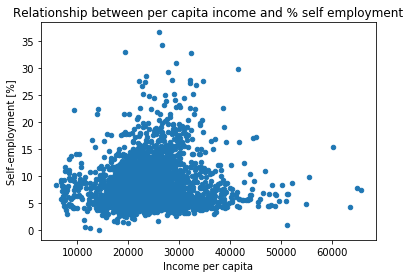

In [6]:
graph1 = self_employed.plot('IncomePerCap', 'SelfEmployed', kind='scatter')
graph1.set_title('Relationship between per capita income and % self employment')
graph1.set_xlabel('Income per capita')
graph1.set_ylabel('Self-employment [%]')

**We can't visualy observe any dependency. We decide to check the Spearman correlation for a monotonic relationship between the variables.**

Pearson correlation is more limited, since it only examines linear relationship. It also requires the assumption that the data distributions will be Gaussian. We decide to use the Spearman coefficient since it is more accomodating (even though there is a corresponding loss of power). It is also more general, looking at upwards tendencies instead of a strict linear relationship.

We will base our conclusions not on the p-value (that becomes significant for any large dataset) but on the effect size as interpreted by the correlation coefficient r. It is generally accepted that 0.1 represents a small effect, 0.3 a medium effect, and 0.5 a large effect.

In [7]:
corr_value, p_value = stats.spearmanr(self_employed.SelfEmployed, self_employed.IncomePerCap, axis=0)

In [8]:
print(corr_value)
print(p_value)

0.056413673053189874
0.0013623847564714516


**We have a significant p-value (<0.05), so we would reject the null hypothesis of no relationship. However, significance is reached far too easily with large datasets. We recall that an r-value of 0.1 represents a small effect, so the effect we see here is so small as to be meaningless.**

**In counties where self employment rates are higher, is more income per capita earned? Based on the small effect size, no.**

## Task 1B-C

### We perform a pilot program examining the dependency between self-employment and per capita income in Minnesota, Tennessee, and Wisconsin.

In [9]:
pilot1 = self_employed.loc[(self_employed['State'] == 'Minnesota') | (self_employed['State'] == 'Wisconsin') |
                           (self_employed['State'] == 'Tennessee')]

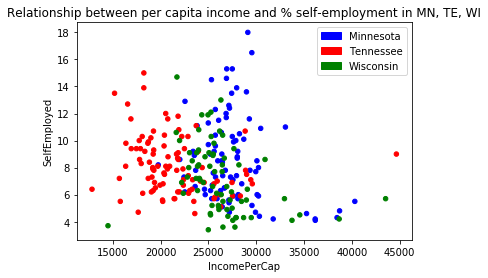

In [10]:
color_dict = {'Minnesota': 'blue', 'Wisconsin':'green', 'Tennessee':'red'}
graph2 = pilot1.plot('IncomePerCap', 'SelfEmployed', kind='scatter', color = [color_dict[i] for i in pilot1.State])
graph2.set_title('Relationship between per capita income and % self-employment in MN, TE, WI')

red_patch = matplotlib.patches.Patch(color='red', label='Tennessee')
blue_patch = matplotlib.patches.Patch(color='blue', label='Minnesota')
green_patch = matplotlib.patches.Patch(color='green', label='Wisconsin')
graph2.legend(handles=[blue_patch, red_patch, green_patch])

As before we calculate the Spearman correlation coefficient and interpret the effect size.

In [13]:
corr_value1, p_value1 = stats.spearmanr(pilot1.SelfEmployed, pilot1.IncomePerCap, axis=0)
print(corr_value1)

-0.2366979000103385


**Here we see a small-to-medium negative effect, indicating that per capita income decreases slightly as the percentage of self employment increases.**

**Next we would like to see in which state the effect is strongest. **

In [14]:
#Each state from the pilot separately
MN = pilot1.loc[pilot1.State == 'Minnesota']
WI = pilot1.loc[pilot1.State == 'Wisconsin']
TE = pilot1.loc[pilot1.State == 'Tennessee']

corr_valueMN, p_value = stats.spearmanr(MN.SelfEmployed, MN.IncomePerCap, axis=0)
print('Correlation from MN: ' + str(corr_valueMN))

corr_valueWI, p_value = stats.spearmanr(WI.SelfEmployed, WI.IncomePerCap, axis=0)
print('Correlation from WI: ' + str(corr_valueWI))

corr_valueTE, p_value = stats.spearmanr(TE.SelfEmployed, TE.IncomePerCap, axis=0)
print('Correlation from TE: ' + str(corr_valueTE))

Correlation from MN: -0.21107460598245847
Correlation from WI: -0.46351291044049403
Correlation from TE: -0.316991392780988


**Separately, we see larger effects than together. The strongest effect observed is a negative relationship between the parameters in the state of Wisconsin. In these pilot states at least, more self-employment corresponds to a decrease in per capita income. **

## Task 1D

### Here we perform the same analysis as task B but with a new pilot group (NJ, KS, RI)

In [15]:
pilot1 = self_employed.loc[(self_employed['State'] == 'Kansas') | (self_employed['State'] == 'New Jersey') |
                           (self_employed['State'] == 'Rhode Island')]

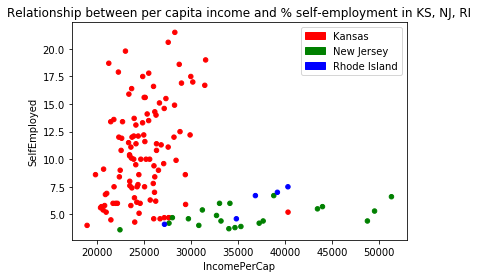

In [16]:
color_dict = {'Kansas': 'red', 'New Jersey':'green', 'Rhode Island':'blue'}
graph2 = pilot1.plot('IncomePerCap', 'SelfEmployed', kind='scatter', color = [color_dict[i] for i in pilot1.State])
graph2.set_title('Relationship between per capita income and % self-employment in KS, NJ, RI')

red_patch = matplotlib.patches.Patch(color='red', label='Kansas')
blue_patch = matplotlib.patches.Patch(color='blue', label='Rhode Island')
green_patch = matplotlib.patches.Patch(color='green', label='New Jersey')
graph2.legend(handles=[red_patch, green_patch, blue_patch])

In [19]:
#Each state from the pilot separately
KS = pilot1.loc[pilot1.State == 'Kansas']
NJ = pilot1.loc[pilot1.State == 'New Jersey']
RI = pilot1.loc[pilot1.State == 'Rhode Island']

corr_valueKS, p_value = stats.spearmanr(KS.SelfEmployed, KS.IncomePerCap, axis=0)
print('Correlation from KS: ' + str(corr_valueKS))

corr_valueNJ, p_value = stats.spearmanr(NJ.SelfEmployed, NJ.IncomePerCap, axis=0)
print('Correlation from NJ: ' + str(corr_valueNJ))

corr_valueRI, p_value = stats.pearsonr(RI.SelfEmployed, RI.IncomePerCap)
print('Correlation from RI: ' + str(corr_valueRI))

Correlation from KS: 0.28392575483491556
Correlation from NJ: 0.40403460177366013
Correlation from RI: 0.9021788382149803


**Rhode Island shows the largest effect, with a coefficient near 1 after a Spearman analysis, so we consequently calculated the Pearson correlation coefficient and got a likewise high value, indicating a near-linear relationship. The size of the effect remains medium for the other two states in this pilot. **

**Interestingly, and contrary to the previous pilot, this pilot group shows a positive relationship between self employment levels and per capita income. We would prefer to incentivize self-employment in this second pilot group rather than in the first one.**

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

In [57]:
shelter_data = pd.read_csv(DATA_FOLDER + "aac_intakes_outcomes.csv")

In [58]:
shelter = shelter_data[['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 
                       'sex_upon_intake', 'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 
                       'age_upon_outcome_(years)', 'outcome_type']]

In [59]:
#Preliminary cleaning
display(shelter.isna().sum())
shelter = shelter.dropna()

animal_type                  0
intake_year                  0
intake_condition             0
intake_number                0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
time_in_shelter_days         0
sex_upon_outcome             1
age_upon_outcome_(years)     0
outcome_type                10
dtype: int64

In [60]:
shelter.head(1)

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_type
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10.0,0.588194,Neutered Male,10.0,Return to Owner


## Task 2A

### Perform dummy-variable encoding of categorical features. Split data into 80% training and 20% test sets. Pair feature vectors with outcomes (adoption or not). Standardize feature values.

In [61]:
#We need to remove the outcomes before we make dummy variables
#Outcomes are True/False values based on whether the animal was adopted or not
outcomes = (shelter['outcome_type'] == 'Adoption')
outcomes = pd.DataFrame(outcomes)

shelter = shelter.drop(columns=['outcome_type'])

In [62]:
#Categorical variables
categorical_list = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake', 'sex_upon_outcome']

shelter = pd.get_dummies(shelter, columns=categorical_list)
shelter.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,2017,1.0,10.0,0.588194,10.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2014,2.0,7.0,1.259722,7.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014,3.0,6.0,1.113889,6.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2014,1.0,10.0,4.970139,10.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2013,1.0,16.0,0.119444,16.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [84]:
features_with_outcomes = shelter.merge(outcomes, left_index=True, right_index=True)

#Split into training and test sets (80 and 20% respectively)
training_set = features_with_outcomes.sample(frac=0.8, random_state=np.random.seed(1))
test_set = features_with_outcomes.drop(training_set.index)

#Extract the outcomes
training_outcomes = training_set[['outcome_type']]
training_set.drop(columns=['outcome_type'], inplace=True)

test_outcomes = test_set[['outcome_type']]
test_set.drop(columns=['outcome_type'], inplace=True)

In [85]:
#Standardization: standardized = (val - mean) / stdv
def standardize(data, columns):
    """
    Standardize values in columns so they have a mean of 0 and a standard deviation of 1
    IN: dataframe, names of columns
    OUT: standardized dataframe
    """
    for i in range(data[columns].shape[1]):
        mean = data.iloc[:, i].mean()
        stdv = data.iloc[:, i].std()
        data.iloc[:, i] = (data.iloc[:, i] - mean) / stdv
    return data

In [86]:
training_set = standardize(training_set, training_set.columns.values)
test_set = standardize(test_set, test_set.columns.values)

## Task 2B

### Train a logistic regression classifier. Predict outcomes with a threshold of 0.5. Present classifier performance with the confusion matrix and metrics. Visualize the metrics as we vary the threshold between 0 and 1. What is the most relevant metric (and in respect to which class) when choosing the threshold?

**Logistic regression classifier **

In [87]:
#create then train the model
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(training_set, training_outcomes['outcome_type'].tolist())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

With the classifier, we can predict the probabilities of adoption or not. The function below gives a multidimensional array with the probability of the negative and the positive outcomes (columns 0 and 1 respectively) for each given feature vector.

In [88]:
outcome_probabilities = logistic.predict_proba(test_set)

**We want to know if an animal will be adopted or not. The animal will be adopted if the probability of a positive outcome, as predicted by the classifier, is higher than our threshold value.**

In [89]:
def prediction(prob_outcome, threshold):
    """
    We generate a True-False list predicting whether the positive outcome will occur or not
    IN: probability for the +1 or for the -1 label as caluculated by the classifier; threshold value
    OUT: boolean array with True if the outcome is predicted, and False if it is not
    """
    predicted_outcomes = []
    for i in range(prob_outcome.shape[0]):
        if prob_outcome[i] > threshold:
            predicted_outcomes.append(True)
        else:
            predicted_outcomes.append(False)
            
    return predicted_outcomes

In [90]:
threshold=0.5
predicted_outcomes = prediction(outcome_probabilities[:,1], threshold)

**The confusion matrix shows where the model was accurate at predicting, based on the known outcomes from the test set. With this we can evaluate the performance of the model.**

The confusion matrix gives us the numbers of true/false positives/negatives given by the model.

Upper left: true positive. Upper right: false positive. Lower left: false negative. Lower right: true negative.

In [96]:
def calculate_confusion_matrix(actual_outcomes, predicted_outcomes):
    """
    Calculate confusion matrix with number of true/false positives/negatives
    IN: actual and predicted outcomes from the test dataset
    OUT: confusion matrix as an array
    """
    matrix = np.asarray([[0, 0], [0, 0]])
    
    for i in range(len(actual_outcomes)):
        if actual_outcomes[i] and predicted_outcomes[i]:
            matrix[0,0] = matrix[0,0] + 1
        if actual_outcomes[i] and not predicted_outcomes[i]:
            matrix[1,0] = matrix[1,0] + 1
        if not actual_outcomes[i] and predicted_outcomes[i]:
            matrix[0,1] = matrix[0,1] + 1
        if not actual_outcomes[i] and not predicted_outcomes[i]:
            matrix[1,1] = matrix[1,1] + 1
            
    return matrix

In [97]:
conf_matrix = calculate_confusion_matrix(test_outcomes['outcome_type'].tolist(), predicted_outcomes)
display(conf_matrix)

array([[5434, 1576],
       [1259, 7663]])

**The performance of the model is evaluated by calculating the metrics (accuracy, precision, recall, and F1 score).**

In [98]:
def negative_class_matrix(matrix):
    """
    From the normal confusion matrix calculated from the positive class,
    generate the flipped matrix corresponding to the negative class
    IN: confusion matrix
    OUT: flipped confusion matrix
    """
    
    neg_matrix = np.flip(matrix, axis=1)
    neg_matrix = np.flip(neg_matrix, axis=0)
    
    return neg_matrix

In [99]:
#Manual calculation of metrics
def calculate_metrics(matrix, positive_class=True):
    """
    Calculate accuracy, precision, recall, F1 score from a confusion matrix
    IN: confusion matrix, boolean indicating positive class or negative
    OUT: metrics (accuracy, precision, recall, F1 score), in dataframe format
    """
     
    accuracy = (matrix[0,0]+matrix[1,1]) / matrix.sum()
        
    if not positive_class:
        matrix = negative_class_matrix(matrix)
    
    precision = matrix[0,0] / matrix[0,:].sum()
    recall = matrix[0,0] / matrix[:,0].sum()
    F1_score = 2*(precision*recall) / (precision+recall)
            
    
    metrics = pd.Series([accuracy, precision, recall, F1_score])
    metrics.rename(index={0:'accuracy', 1:'precision', 2:'recall', 3:'F1_score'}, inplace=True)
    
    return metrics

In [100]:
metrics = calculate_metrics(conf_matrix)
display(metrics)

accuracy     0.822056
precision    0.775178
recall       0.811893
F1_score     0.793111
dtype: float64

**We also want to know the metrics for the negative class: **

In [101]:
neg_metrics = calculate_metrics(conf_matrix, positive_class=False)
display(neg_metrics)

accuracy     0.822056
precision    0.858888
recall       0.829419
F1_score     0.843896
dtype: float64

**Next we will vary the threshold between 0 and 1 and view the metrics. **

In [104]:
def view_metrics(pos_outcome_prob, threshold_list, test_outcome_list, positive_class=True, title=None):
    """
    From the classifier results, calculate the prediction, the confusion matrix, and the metrics.
    Plot the metrics based on the threshold.
    IN: the probability of a positive outcome, the list of threshold values, the test outcomes in list format,
    and whether we want the positive or negative class metrics
    """
    metrics_df = pd.DataFrame()
    
    for i in range(threshold_list.shape[0]):
        predicted_outcomes = prediction(pos_outcome_prob, threshold_list[i])
        conf_matrix = calculate_confusion_matrix(test_outcome_list, predicted_outcomes)
        metric_i = calculate_metrics(conf_matrix, positive_class)
        metrics_df = metrics_df.append(metric_i, ignore_index=True)
        
    metrics_df.columns = ['accuracy', 'precision', 'recall', 'F1_score']
    
    plt.figure(figsize=(10,6))
    plt.plot(threshold, metrics_df.accuracy)
    plt.plot(threshold, metrics_df.precision)
    plt.plot(threshold, metrics_df.recall)
    plt.plot(threshold, metrics_df.F1_score)
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('Value of the metric')
    plt.title(title)

The threshold cannot be exactly equal to zero (that would be meaningless), so we start at 0.01

In [105]:
threshold = np.linspace(0.01, 1, 100)

/home/astrefeler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


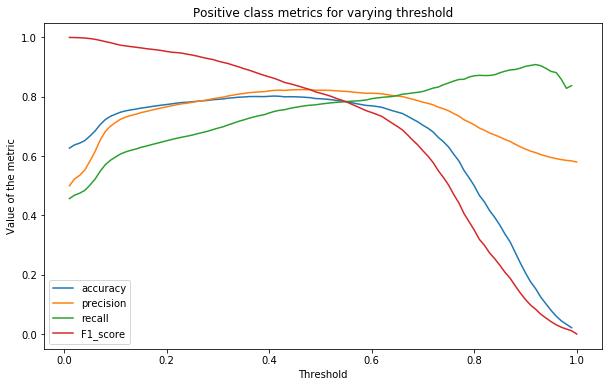

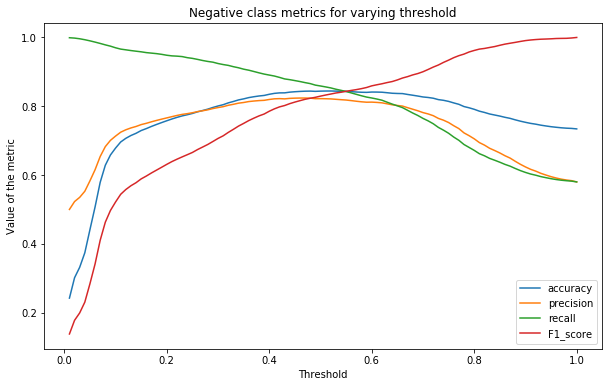

In [106]:
view_metrics(outcome_probabilities[:,1], threshold, test_outcomes.outcome_type.tolist(), positive_class=True, title='Positive class metrics for varying threshold')
view_metrics(outcome_probabilities[:,1], threshold, test_outcomes.outcome_type.tolist(), positive_class=False, title='Negative class metrics for varying threshold')

**What is the most relevant metric when determining the threshold? **

Accuracy gives information about how many true values were determined by the model. However, it does not take into account the errors and assumes false positives and negatives have the same importance.

Precision determines the fraction of predicted positives that were actually positive. Optimizing precision would mean lowering the number of false positives, but this would also increase the number of false negatives. For the positive class, that means animals that would actually have been adopted will be euthanized. For the negative class, it means the shelter will be overcrowded since animals that wouldn't have been adopted will be kept.

Recall determines the fraction of true positives that were recognized. To optimize recall, we would lower the number of false negatives. This would increase the number false positives. For the positive class, that means an overcrowded shelter as animals that won't be adopted are kept. For the negative class, that means euthanizing animals that would have been adopted.

The F1 score is the harmonic mean of precision and recall. It allows for a compromise between those two values. We think this is the most relevant statistic to choose the threshold since it will balance between false positive and negative rates (for either class), limiting both the number of euthanized animals and shelter overcrowding.

## Task 2C

### Select a subset of k best features using greedy backward selection. Evaluate performance with 5-fold cross validation on the training set. Choose the optimal k, and interpret the impact of the top-k features on adoption.

Although it wasn't explicit in the instructions, a question on mattermost revealed that performance should be evaluated using the accuracy metric. Since it wasn't clear, we could use another metric (such as the F1 score) as long as it is justified.

N-fold cross validation involves splitting a set of data into N subsets, of which one is chosen as the test set, iteratively. For each iteration, the performance statistic is calculated. At the end, the average of the statistic represents its value for the entire dataset. The process of cross validation serves to avoid overfitting to a single test subset of the data.

In [107]:
def cross_validation(features, outcomes, classifier='logistic', estimators=100, depth=5, k_fold=5, threshold=0.5):
    """
    Cross validate a model using the accuracy metric
    IN: feature vectors; corresponding outcomes; classifier to use (either logistic regression of random forest);
    estimators and maximum depth for the random forest model as integers;
    k_fold cross validation; threshold value
    OUT: accuracy metric for the data
    """
    
    #Split features into k_fold datasets
    n = int(features.shape[0]/k_fold)
    list_features = [features[i:i+n] for i in range(0, features.shape[0], n)]
    list_outcomes = [outcomes[i:i+n] for i in range(0, outcomes.shape[0], n)]
    
    accuracies = []
    
    for i in range(k_fold):
        #Select test subset
        test = list_features[i]
        test_outcomes = list_outcomes[i]
        
        training = pd.DataFrame()
        training_outcomes = pd.DataFrame()
        
        #Extract training subset (all data except test)
        for j in range(len(list_features)):
            if j != i:
                training = training.append(list_features[j])
                
                outcomes = list_outcomes[j].merge(list_features[j], left_index=True, right_index=True)
                training_outcomes = training_outcomes.append(outcomes[['outcome_type']])
        
        #Create and train model
        if classifier == 'logistic':
            model = LogisticRegression(solver='lbfgs')   
       
        if classifier == 'random forest':
            model = RandomForestClassifier(n_estimators=estimators, max_depth=depth)
        
        model.fit(training, training_outcomes['outcome_type'].tolist())
        
        #Calculate prediction, confusion matrix, and performance metric (accuracy)
        outcome_probabilities = model.predict_proba(test)
        predicted_outcomes = prediction(outcome_probabilities[:,1], threshold)
        conf_matrix = calculate_confusion_matrix(test_outcomes['outcome_type'].tolist(), predicted_outcomes)
        
        accuracy_i = (conf_matrix[0,0]+conf_matrix[1,1]) / conf_matrix.sum()
        
        accuracies.append(accuracy_i)
    
    #Return the mean accuracy
    return sum(accuracies)/len(accuracies)

In [108]:
def greedy_backward_selection_LogR(features, outcomes, k_features):
    """
    For a logistic regression classifier, use greedy backward selection to find the top k features of the model.
    Performance is evaluated using 5-fold cross-validation on the accuracy statistic.
    IN: feature vectors; corresponding outcomes; k number of features to select
    OUT: k remaining columns and the corresponding accuracy
    """
    
    k_features.sort(reverse=True)
    
    baseline_accuracy = cross_validation(features, outcomes)
    accuracy_for_k = []
    
    for i in range(len(k_features)):
        k = k_features[i]
        
        while features.shape[1] > k:
            
            accuracy_diff = []
        
            #Evaluate the effect of dropping each column; where perfomance changes minimally, we drop that column
            for l in range(features.shape[1] - 1):
                filtered_features = features.drop(columns=features.columns[l])
                accuracy_l = cross_validation(filtered_features, outcomes)
                accuracy_diff.append(baseline_accuracy - accuracy_l)
        
            col_to_drop = accuracy_diff.index((min(accuracy_diff)))
            print("for k = {}, drop column {}".format(k, features.columns[col_to_drop]))
            features = features.drop(columns = features.columns[col_to_drop])
            
        if features.shape[1] == k:
            k_accuracy = cross_validation(features, outcomes)
            accuracy_for_k.append((k, k_accuracy))
            
        if features.shape[1] == 1:
            print("The last remaining column is {}".format(features.columns))
            
    return accuracy_for_k

Note that we perform this operation on the training set, as specified in the instructions. The whole data set could be used if it was standardized first.

In [109]:
k = [1, 5, 10, 15, 20, 25, 30]
accuracy_per_k = greedy_backward_selection_LogR(training_set, training_outcomes, k)

for k = 30, drop column age_upon_outcome_(years)
for k = 30, drop column animal_type_Bird
for k = 25, drop column intake_condition_Pregnant
for k = 25, drop column intake_condition_Injured
for k = 25, drop column intake_type_Owner Surrender
for k = 25, drop column sex_upon_intake_Intact Male
for k = 25, drop column sex_upon_outcome_Intact Female
for k = 20, drop column sex_upon_intake_Intact Female
for k = 20, drop column sex_upon_intake_Unknown
for k = 20, drop column sex_upon_outcome_Intact Male
for k = 20, drop column intake_condition_Aged
for k = 20, drop column intake_condition_Nursing
for k = 15, drop column intake_condition_Other
for k = 15, drop column intake_condition_Sick
for k = 15, drop column animal_type_Dog
for k = 15, drop column intake_type_Euthanasia Request
for k = 15, drop column animal_type_Cat
for k = 10, drop column intake_type_Wildlife
for k = 10, drop column animal_type_Other
for k = 10, drop column intake_condition_Feral
for k = 10, drop column intake_number
fo

**Some of the most important features found by this method are the sex of the animal upon adoption, and the time it spent in the shelter. Some of the least important features are the intake condition, which makes sense since animals are nursed back to health before being put up for adoption. **

Text(0.5,1,'Accuracy per k features after greedy backwards selection')

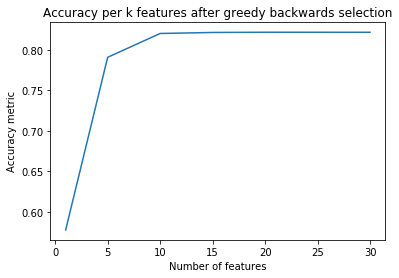

In [110]:
x_val = [x[0] for x in accuracy_per_k]
y_val = [x[1] for x in accuracy_per_k]
plt.plot(x_val, y_val)
plt.xlabel('Number of features')
plt.ylabel('Accuracy metric')
plt.title('Accuracy per k features after greedy backwards selection')

**We see that the metric plateaus at 10 features. Features kept at this point are the most important for the prediction, while features removed before then had little impact. k=10 is therefore the optimal number of features to select.**

## Task 2D

### Train a Random Forest classifier. Find the best parameters (number of estimators and maximum tree depth) using a grid search with cross validation on the training set. For the best parameters, evaluate performance with metrics and confusion matrix. Compare performance with the logistic regression classifier.

In [111]:
def RF_parameters(features, outcomes, max_depth, n_estimators):
    """
    Grid-search using cross validation to find the best parameters for a random forest classifier
    IN: features and corresponding outcomes; lists of possible values for depth and estimators
    OUT: optimal depth and estimator parameters, with the accuracy metric
    """
    accuracy_df = pd.DataFrame()
    for j in range(max_depth.shape[0]):
        for i in range(n_estimators.shape[0]):
            accuracy_ij = cross_validation(features, outcomes, classifier='random forest', estimators=int(n_estimators[i]), depth=int(max_depth[j]))
            accuracy_df = accuracy_df.append(pd.Series([n_estimators[i], max_depth[j], accuracy_ij]), ignore_index=True)
    
    accuracy_df.columns = ['n_estimators', 'max_depth', 'accuracy']
    
    #The best parameters give the maximum accuracy
    ind = accuracy_df['accuracy'].idxmax()
    
    return accuracy_df.iloc[ind]

In [112]:
depth_range = np.linspace(10, 20, 11)
estimator_range = np.linspace(50, 200, 7)
parameters = RF_parameters(training_set, training_outcomes, depth_range, estimator_range)

In [113]:
parameters

n_estimators    150.000000
max_depth        15.000000
accuracy          0.856053
Name: 39, dtype: float64

**Now that we have the best parameters, we can recalculate a Random Forest just with them, to get the confusion matrix and to calculate all the metrics. **

In [114]:
threshold=0.5
model = RandomForestClassifier(n_estimators=int(parameters[0]), max_depth=int(parameters[1]))
model.fit(training_set, training_outcomes['outcome_type'].tolist())
outcome_probabilities = model.predict_proba(test_set)
predicted_outcomes = prediction(outcome_probabilities[:,1], threshold)
conf_matrix = calculate_confusion_matrix(test_outcomes['outcome_type'].tolist(), predicted_outcomes)

In [115]:
print("Positive class metrics:")
metrics = calculate_metrics(conf_matrix)
display(metrics)

print("Negative class metrics:")
neg_metrics = calculate_metrics(conf_matrix, positive_class=False)
display(neg_metrics)

Positive class metrics:


accuracy     0.856264
precision    0.789404
recall       0.897206
F1_score     0.839860
dtype: float64

Negative class metrics:


accuracy     0.856264
precision    0.917357
recall       0.826605
F1_score     0.869620
dtype: float64

**For both the positive and negative classes, the Random Forest classifier gives better performance than the logistic regression classifier. However, this has the cost of requiring much more computing power. **